# **Implementasi Metode SVR**
**Dataset :** Jakarta

**Kelompok :** 13 - PMA (B)

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns
from tabulate import tabulate

# untuk SVR
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# untuk evaluasi
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Load & Pre-processing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jakarta 2015 - 2022.csv to Jakarta 2015 - 2022.csv


In [ ]:
data_svr = pd.read_csv('Jakarta 2015 - 2022.csv')
data_svr.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123


In [ ]:
#cek null
data_svr.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
data_asli = data_svr.copy()

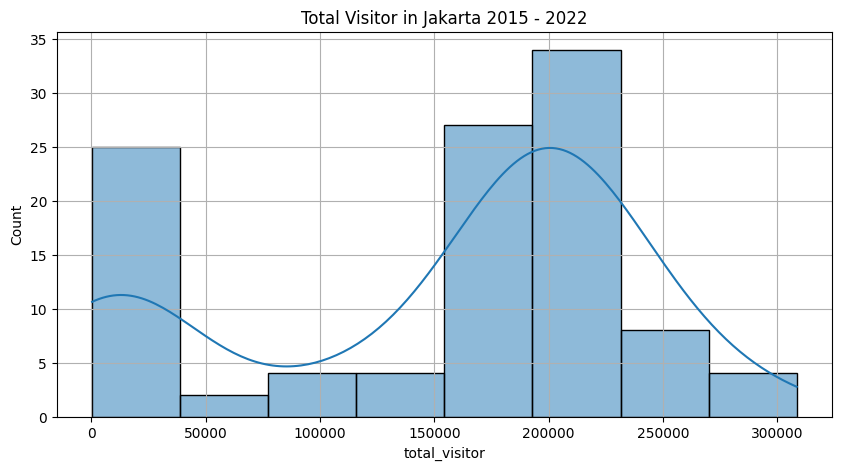

In [ ]:
# plot to see the total visitor varience
plt.figure(figsize=(10, 5))
sns.histplot(data_svr['total_visitor'], kde=True)
plt.title("Total Visitor in Jakarta 2015 - 2022")
plt.grid()
plt.show()

In [ ]:
# set data index as datetime column
train_datetime = pd.to_datetime(data_svr.datetime)
data_svr = data_svr.set_index('datetime')
data_svr

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123
...,...,...
8/1/2022,121438,68569
9/1/2022,111139,69382
10/1/2022,112588,69626


In [ ]:
input_col = list(data_svr)[0:2]
print(input_col)

['total_visitor', 'total_accomodation']


In [ ]:
data_for_training = data_svr[input_col].astype(float)

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(data_for_training)
scaled_data_train = scaler.transform(data_for_training)

scaled_data_train = pd.DataFrame(scaled_data_train, columns=['total_visitor', 'total_accomodation'])
scaled_data_train

,total_visitor,total_accomodation
0,0.625267,0.000000
1,0.602004,0.014015
2,0.660936,0.020156
3,0.603698,0.029360
4,0.617797,0.032640
...,...,...
103,0.392893,0.951997
104,0.359458,0.966813
105,0.364162,0.971260
106,0.368610,0.975215


## Scenario 1
80% Train - 20% Test


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = scaled_data_train[['total_accomodation', 'total_visitor']].values
y = scaled_data_train['total_visitor'].values

# Pembagian dataset train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (86, 2)
Train Y shape: (86,)
Test X shape: (22, 2)
Test Y shape: (22,)


In [ ]:
# Mencari parameter terbaik dengan GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svr = SVR()
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan pelatihan model dengan data latih
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
# Membangun model SVR dengan parameter terbaik
best_svr = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
best_svr.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = best_svr.predict(X_test)

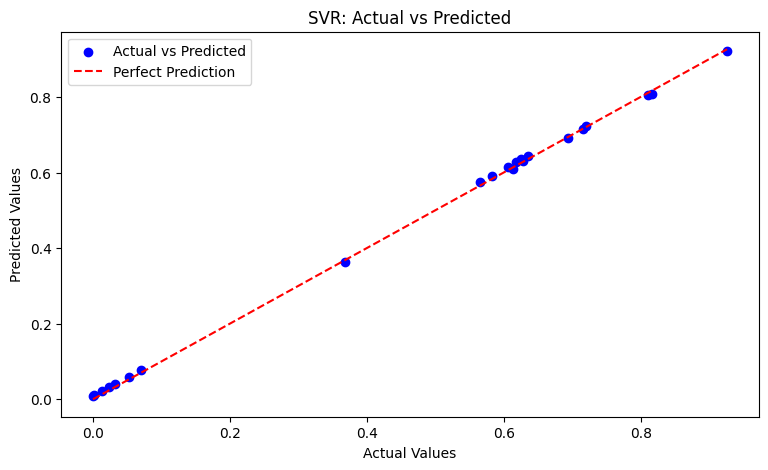

In [ ]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions = best_svr.predict(X_train[-n_month_for_prediction:])
mse = mean_squared_error(y_train[-n_month_for_prediction:], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train[-n_month_for_prediction:], predictions)
mae = mean_absolute_error(y_train[-n_month_for_prediction:], predictions)
mape = mean_absolute_percentage_error(y_train[-n_month_for_prediction:], predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 2.8046919446884526e-05
RMSE: 0.005295934237401795
R2: 0.9996608909339926
MAE: 0.00493043987633347
MAPE: 0.09874182056517038


In [ ]:
# Mendenormalisasi data agar kembali ke data aktual
predictions=predictions.reshape(-1,1)
prediction_copies = np.repeat(predictions, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

<ipython-input-42-a5cefe9ddb22>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


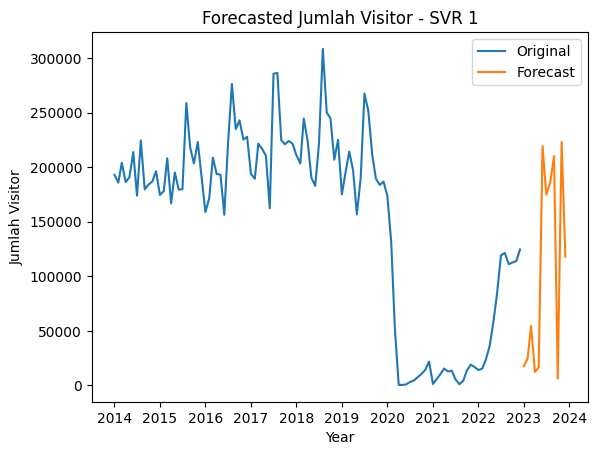

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      17444.8 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      24609.7 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      54598.4 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      12379.9 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      16638.9 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     219363   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     174966   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     185730   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     210074   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       6144   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     223105   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original = data_asli[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - SVR 1')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

## Scenario 2
70% Train - 30% Test


In [ ]:
# Memisahkan fitur (X) dan target (y)
X_2 = scaled_data_train[['total_accomodation', 'total_visitor']].values
y_2 = scaled_data_train['total_visitor'].values

# Pembagian dataset train dan test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [ ]:
print("Train X shape:", X_train_2.shape)
print("Train Y shape:", y_train_2.shape)
print("Test X shape:", X_test_2.shape)
print("Test Y shape:", y_test_2.shape)

Train X shape: (75, 2)
Train Y shape: (75,)
Test X shape: (33, 2)
Test Y shape: (33,)


In [ ]:
# Mencari parameter terbaik dengan GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svr = SVR()
# Inisialisasi GridSearchCV
grid_search_2 = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan pelatihan model dengan data latih
grid_search_2.fit(X_train_2, y_train_2)

best_params_2 = grid_search.best_params_
print("Best Parameters:", best_params_2)

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
# Membangun model SVR dengan parameter terbaik
best_svr_2 = SVR(C=best_params_2['C'], epsilon=best_params_2['epsilon'], kernel=best_params_2['kernel'])
best_svr_2.fit(X_train_2, y_train_2)

# Melakukan prediksi pada data testing
y_pred_2 = best_svr_2.predict(X_test_2)

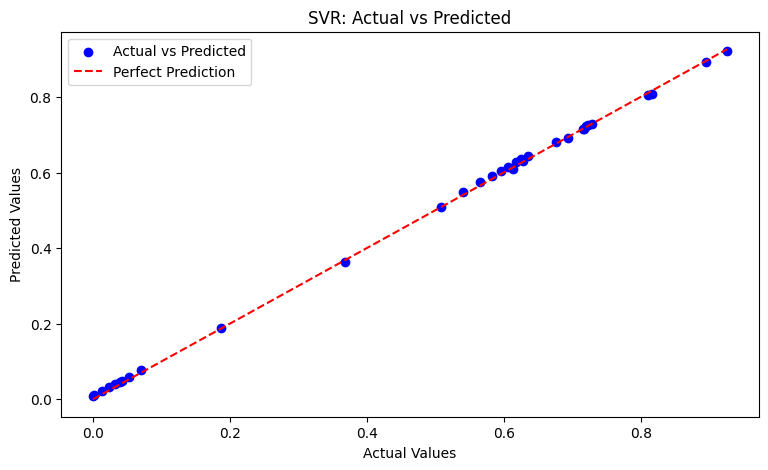

In [ ]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(9, 5))
plt.scatter(y_test_2, y_pred_2, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test_2), max(y_pred_2))
min_value = min(min(y_test_2), min(y_pred_2))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions2 = best_svr.predict(X_train_2[-n_month_for_prediction:])
mse2 = mean_squared_error(y_train_2[-n_month_for_prediction:], predictions2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_train_2[-n_month_for_prediction:], predictions2)
mae2 = mean_absolute_error(y_train_2[-n_month_for_prediction:], predictions2)
mape2 = mean_absolute_percentage_error(y_train_2[-n_month_for_prediction:], predictions2)

print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r2_2)
print("MAE:", mae2)
print("MAPE:", mape2)

MSE: 2.8046919446884526e-05
RMSE: 0.005295934237401795
R2: 0.9996608909339926
MAE: 0.00493043987633347
MAPE: 0.09874182056517038


In [ ]:
# Mendenormalisasi data agar kembali ke data aktual
predictions2=predictions2.reshape(-1,1)
prediction_copies2 = np.repeat(predictions2, data_for_training.shape[1], axis=-1)
y_pred_future_2 = scaler.inverse_transform(prediction_copies2)[:,0]

<ipython-input-31-05c9ef20c0f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2['datetime'] = pd.to_datetime(original2['datetime'])


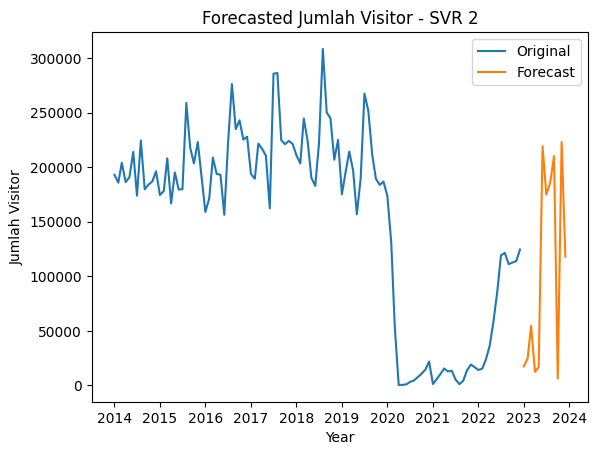

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      17444.8 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      24609.7 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      54598.4 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      12379.9 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      16638.9 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     219363   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     174966   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     185730   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     210074   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       6144   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     223105   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast_2 = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future_2})
df_forecast_2['Date'] = pd.to_datetime(df_forecast_2['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original2 = data_asli[['datetime', 'total_visitor']]
original2['datetime'] = pd.to_datetime(original2['datetime'])
original2 = original2.loc[original2['datetime'] >= '2013-01-01']

sns.lineplot(data=original2, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - SVR 2')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates_1, y_pred_future_2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table2)

## Scenario 3
60% Train - 40% Test


In [ ]:
# Memisahkan fitur (X) dan target (y)
X_3 = scaled_data_train[['total_accomodation', 'total_visitor']].values
y_3 = scaled_data_train['total_visitor'].values

# Pembagian dataset train dan test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.4, random_state=42)

In [ ]:
print("Train X shape:", X_train_2.shape)
print("Train Y shape:", y_train_2.shape)
print("Test X shape:", X_test_2.shape)
print("Test Y shape:", y_test_2.shape)

Train X shape: (75, 2)
Train Y shape: (75,)
Test X shape: (33, 2)
Test Y shape: (33,)


In [ ]:
# Mencari parameter terbaik dengan GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svr = SVR()
# Inisialisasi GridSearchCV
grid_search_3 = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan pelatihan model dengan data latih
grid_search_3.fit(X_train_3, y_train_3)

best_params_3 = grid_search.best_params_
print("Best Parameters:", best_params_3)

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
# Membangun model SVR dengan parameter terbaik
best_svr_3 = SVR(C=best_params_3['C'], epsilon=best_params_3['epsilon'], kernel=best_params_3['kernel'])
best_svr_3.fit(X_train_3, y_train_3)

# Melakukan prediksi pada data testing
y_pred_3 = best_svr_3.predict(X_test_3)

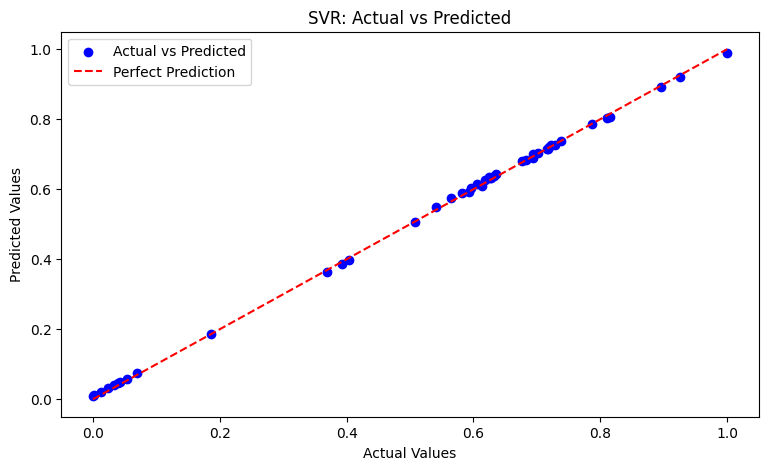

In [ ]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(9, 5))
plt.scatter(y_test_3, y_pred_3, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test_3), max(y_pred_3))
min_value = min(min(y_test_3), min(y_pred_3))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions3 = best_svr.predict(X_train_3[-n_month_for_prediction:])
mse3 = mean_squared_error(y_train_3[-n_month_for_prediction:], predictions3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_train_3[-n_month_for_prediction:], predictions2)
mae3 = mean_absolute_error(y_train_3[-n_month_for_prediction:], predictions3)
mape3 = mean_absolute_percentage_error(y_train_3[-n_month_for_prediction:], predictions3)

print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2:", r2_3)
print("MAE:", mae3)
print("MAPE:", mape3)

MSE: 2.8046919446884526e-05
RMSE: 0.005295934237401795
R2: 0.9996608909339926
MAE: 0.00493043987633347
MAPE: 0.09874182056517038


In [ ]:
# Mendenormalisasi data agar kembali ke data aktual
predictions3=predictions3.reshape(-1,1)
prediction_copies3 = np.repeat(predictions3, data_for_training.shape[1], axis=-1)
y_pred_future_3 = scaler.inverse_transform(prediction_copies3)[:,0]

<ipython-input-40-01bab951fc9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original3['datetime'] = pd.to_datetime(original3['datetime'])


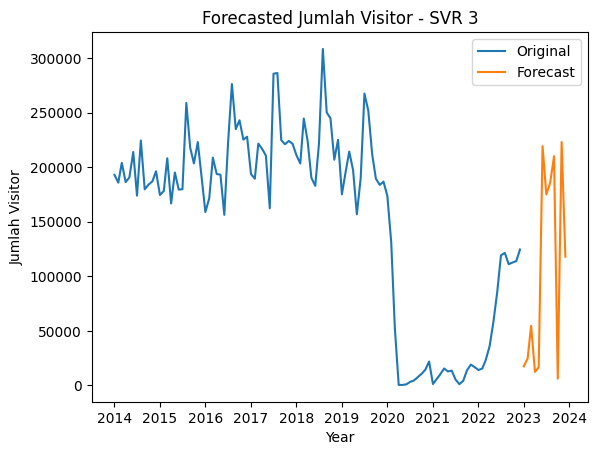

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      17444.8 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      24609.7 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      54598.4 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      12379.9 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      16638.9 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     219363   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     174966   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     185730   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     210074   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       6144   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     223105   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast_3 = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future_3})
df_forecast_3['Date'] = pd.to_datetime(df_forecast_3['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original3 = data_asli[['datetime', 'total_visitor']]
original3['datetime'] = pd.to_datetime(original3['datetime'])
original3 = original3.loc[original3['datetime'] >= '2013-01-01']

sns.lineplot(data=original3, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_3, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - SVR 3')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates_1, y_pred_future_2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table3)

## Conclusion

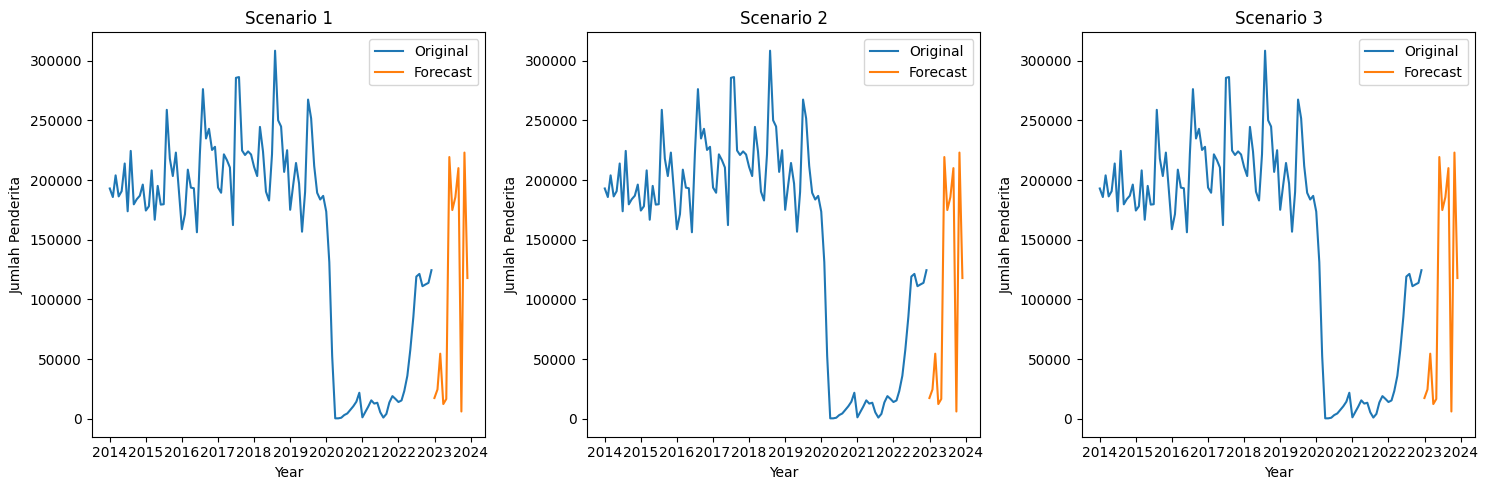

╒════════════╤═════════╤═════════════╤═══════════╤════════════╤════════════╤══════════╕
│ Scenario   │ Model   │         MSE │      MAPE │        MAE │       RMSE │       R2 │
╞════════════╪═════════╪═════════════╪═══════════╪════════════╪════════════╪══════════╡
│ Scenario 1 │ SVR     │ 2.80469e-05 │ 0.0987418 │ 0.00493044 │ 0.00529593 │ 0.999661 │
├────────────┼─────────┼─────────────┼───────────┼────────────┼────────────┼──────────┤
│ Scenario 2 │ SVR     │ 2.80469e-05 │ 0.0987418 │ 0.00493044 │ 0.00529593 │ 0.999661 │
├────────────┼─────────┼─────────────┼───────────┼────────────┼────────────┼──────────┤
│ Scenario 3 │ SVR     │ 2.80469e-05 │ 0.0987418 │ 0.00493044 │ 0.00529593 │ 0.999661 │
╘════════════╧═════════╧═════════════╧═══════════╧════════════╧════════════╧══════════╛


In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 1')
plt.legend()

# Scenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 2')
plt.legend()

# Scenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_3 , x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 3')
plt.legend()

plt.tight_layout()
plt.show()

# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'SVR',
        'MSE': mse,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'SVR',
        'MSE': mse2,
        'MAPE': mape2,
        'MAE': mae2,
        'RMSE': rmse2,
        'R2': r2_2
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'SVR',
        'MSE': mse3,
        'MAPE': mape3,
        'MAE': mae3,
        'RMSE': rmse3,
        'R2': r2_3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)